# Import Library

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

# Import Dataset

In [243]:
#data_up5 = pd.read_csv('UP-5.csv')
#data_up6 = pd.read_csv('UP-6.csv')

In [244]:
data_up5 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
data_up6 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-6.csv')

In [245]:
data_up5.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [246]:
data_up6.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


In [247]:
data_up5.isnull().sum()

Formation        0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb.ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [248]:
data_up6.isnull().sum()

FORMATION        0
BIT SIZE (in)    0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb*ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [249]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [250]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

# Pada dataset terlampir, terdapat data kegiatan pengeboran pada sumur UP-5 dan UP-6 yang meliputi:

* FORMATION, merupakan nama formasi batuan yang ditembus pada kedalaman tertentu
* BITSIZE,merupakan ukuran bit yang digunakan (inch)
* TMD,merupakan truemeasured depth (meter)
* TVD,merupakan true vertical depth (meter)
* ROP,merupakan rate of penetration atau laju penetrasi (meter/jam)
* WOB,merupakan weight on bit (ton)
* FR,merupakan laju alir lumpur (gallon/menit)
* SPP,merupakan stand-pipe pressure (psi)
* RPM,merupakan angular speed dari rotasi drillstring (rpm)
* TQ,merupakan bacaan torque (pound-foot)
* MWIN,merupakan densitas lumpur yang dipompakan melalui drillstring (pound/gallon)
* MWOUT,merupakan densitas lumpur yang kembali kepermukaan (pound/gallon)
* RETURN,merupakan persentase volume lumpur yang kembali kepermukaan (%)
* BITTIME,merupakan durasi penggunaan bit yang sama (jam)
* DATETIME,merupakan tanggal dan waktu untuk menembus kedalaman tertentu

# Exploratory Data Analysis

In [251]:
data_up5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Formation      2058 non-null   object 
 1   TMD (m)        2058 non-null   int64  
 2   TVD (m)        2058 non-null   float64
 3   ROP (m/hr)     2058 non-null   float64
 4   WOB (ton)      2058 non-null   int64  
 5   FR (gpm)       2058 non-null   float64
 6   SPP (psi)      2058 non-null   int64  
 7   RPM (rpm)      2058 non-null   int64  
 8   TQ (lb.ft)     2058 non-null   int64  
 9   MW IN (ppg)    2058 non-null   float64
 10  MW OUT (ppg)   2058 non-null   float64
 11  RETURN (%)     2058 non-null   int64  
 12  BIT TIME (hr)  2058 non-null   float64
 13  DATE TIME      2058 non-null   object 
dtypes: float64(6), int64(6), object(2)
memory usage: 225.2+ KB


In [252]:
data_up6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FORMATION      2513 non-null   object 
 1   BIT SIZE (in)  2513 non-null   float64
 2   TMD (m)        2513 non-null   int64  
 3   TVD (m)        2513 non-null   float64
 4   ROP (m/hr)     2513 non-null   float64
 5   WOB (ton)      2513 non-null   int64  
 6   FR (gpm)       2513 non-null   float64
 7   SPP (psi)      2513 non-null   int64  
 8   RPM (rpm)      2513 non-null   int64  
 9   TQ (lb*ft)     2513 non-null   int64  
 10  MW IN (ppg)    2513 non-null   float64
 11  MW OUT (ppg)   2513 non-null   float64
 12  RETURN (%)     2513 non-null   int64  
 13  BIT TIME (hr)  2513 non-null   float64
 14  DATE TIME      2513 non-null   object 
dtypes: float64(7), int64(6), object(2)
memory usage: 294.6+ KB


# Dataset UP-5

## Multivariate Data Analysis

In [253]:
sns.pairplot(data_up5)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [254]:
data_up5.corr(method='pearson')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_63109/433944912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_up5.corr(method='pearson')


,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
TMD (m),1.000000,1.000000,-0.227054,0.236270,-0.121767,0.948814,0.722908,0.064018,0.765365,0.879116,0.358008,0.994750
TVD (m),1.000000,1.000000,-0.227043,0.236264,-0.121764,0.948812,0.722911,0.064014,0.765362,0.879119,0.358008,0.994746
ROP (m/hr),-0.227054,-0.227043,1.000000,-0.405112,0.232410,-0.103467,-0.022481,-0.040455,0.118103,0.010952,0.243881,-0.241818
WOB (ton),0.236270,0.236264,-0.405112,1.000000,0.139157,0.210405,0.154641,0.396434,-0.128102,-0.003600,0.132256,0.260203
FR (gpm),-0.121767,-0.121764,0.232410,0.139157,1.000000,0.053758,0.082661,0.283229,-0.139047,-0.132879,0.613617,-0.129167
SPP (psi),0.948814,0.948812,-0.103467,0.210405,0.053758,1.000000,0.730816,0.115270,0.772071,0.861910,0.517864,0.942389
RPM (rpm),0.722908,0.722911,-0.022481,0.154641,0.082661,0.730816,1.000000,0.007684,0.524779,0.618517,0.474464,0.723161
TQ (lb.ft),0.064018,0.064014,-0.040455,0.396434,0.283229,0.115270,0.007684,1.000000,-0.116015,-0.069147,0.216287,0.059622
MW IN (ppg),0.765365,0.765362,0.118103,-0.128102,-0.139047,0.772071,0.524779,-0.116015,1.000000,0.953472,0.391870,0.749850
MW OUT (ppg),0.879116,0.879119,0.010952,-0.003600,-0.132879,0.861910,0.618517,-0.069147,0.953472,1.000000,0.420085,0.860783


Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_63109/866321558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')


[Text(0.5, 1.0, 'UP-5')]

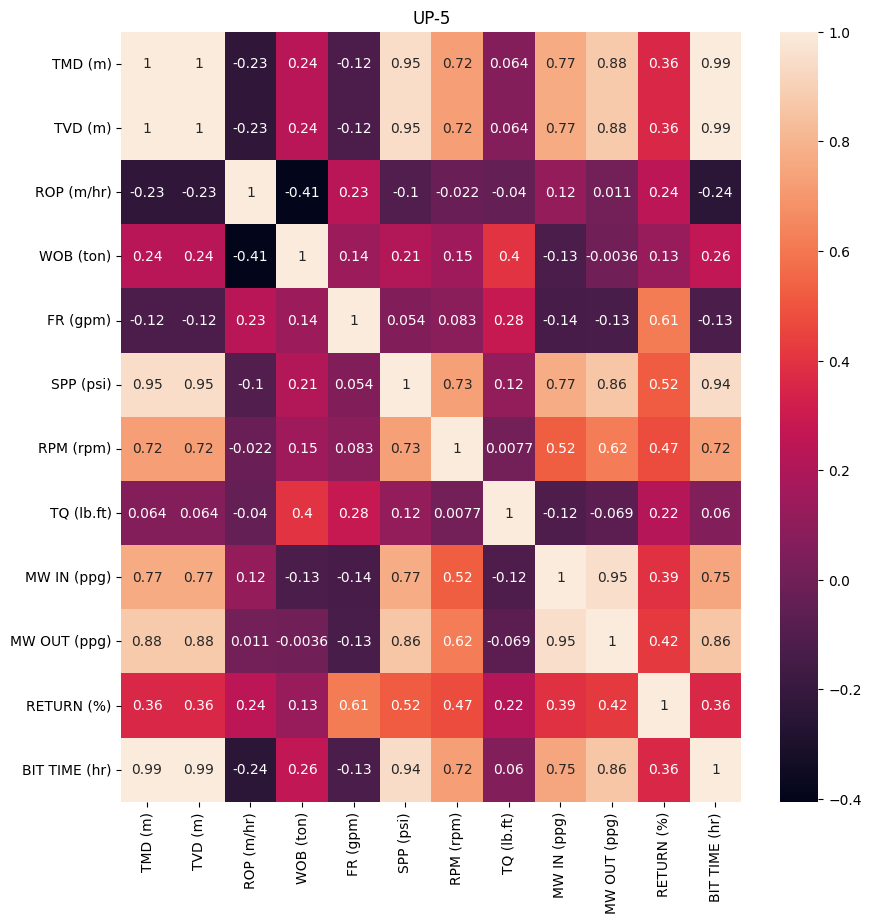

In [255]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')

# Preprocessing Dataset UP-5

In [256]:
#read data

#data_up5 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
data_up5.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [257]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [258]:
#drop feature yang tidak diperlukan

data_up5.drop(['Formation', 'TMD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up5.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,428.01,33.3,3,70,10.4
1,429.01,39.3,4,79,10.4
2,430.00,26.7,3,79,10.4
3,430.99,29.1,5,82,10.4
4,432.00,40.8,10,92,10.4


[Text(0.5, 1.0, 'UP-5')]

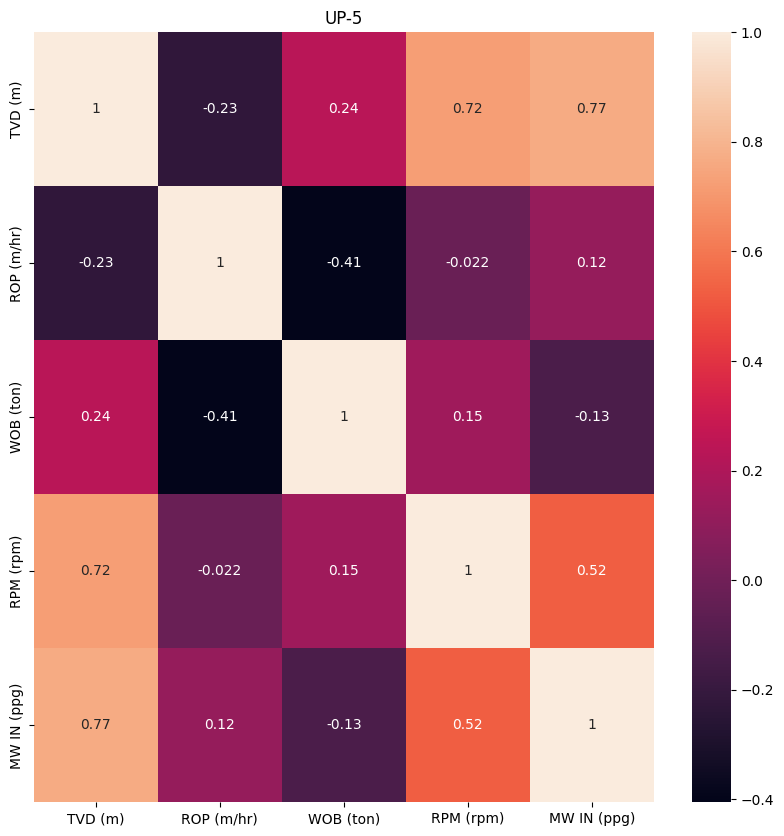

In [259]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')

In [260]:
data_up5.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1456.411924,72.522935,8.744412,156.351312,10.852662
std,594.199795,32.636414,3.591133,23.840552,0.250399
min,428.010000,3.100000,0.000000,70.000000,10.400000
25%,942.177500,49.725000,7.000000,146.000000,10.500000
50%,1456.425000,67.200000,9.000000,158.000000,11.000000
75%,1970.667500,91.875000,11.000000,167.000000,11.000000
max,2484.790000,203.200000,22.000000,199.000000,11.000000


# Random Forest Regressor

In [261]:
#data_up5.drop(['Formation', 'TVD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up5.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,428.01,33.3,3,70,10.4
1,429.01,39.3,4,79,10.4
2,430.00,26.7,3,79,10.4
3,430.99,29.1,5,82,10.4
4,432.00,40.8,10,92,10.4


In [262]:
X = data_up5.drop(['ROP (m/hr)'], axis=1)
y = data_up5['ROP (m/hr)']

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [264]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [265]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.8232146465563102
0.97056998739225


# Model Evaluation and Inspection

In [266]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Validation Curve and Learning Curve for Random Forest Regressor

# Validation Curve

In [267]:
param_range=np.arange(1,6)
param_name='max_depth'
train_scores, valid_scores = validation_curve(RandomForestRegressor(), X_train,
                                              y_train, param_name=param_name,
                                              param_range=param_range, cv=10)

In [268]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

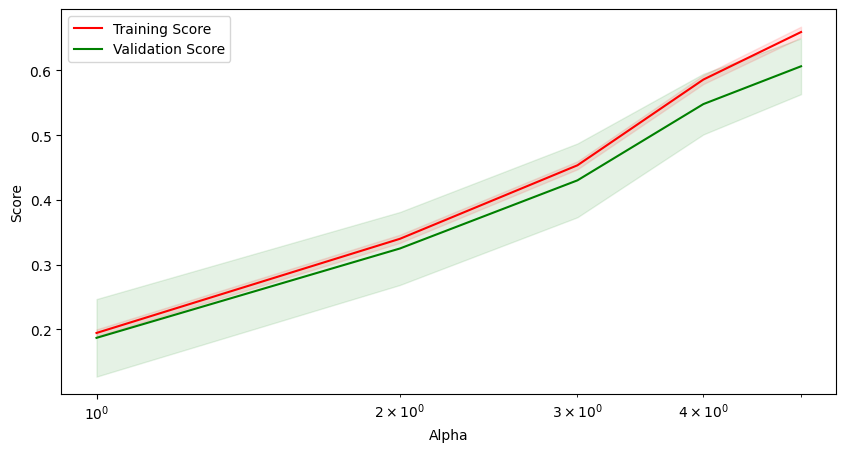

In [269]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.semilogx(param_range, train_scores_mean, label='Training Score', color='red')
axes.semilogx(param_range, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(param_range, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(param_range, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Alpha')
axes.set_ylabel('Score')

## Learning Curve

In [270]:
train_sizes = np.linspace(0.05, 1, 9)

In [271]:
train_sizes = np.linspace(0.05,1,12)
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(RandomForestRegressor(), X_train,
                                                                  y_train, train_sizes=train_sizes, cv=10,
                                                                  return_times=True)

In [272]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

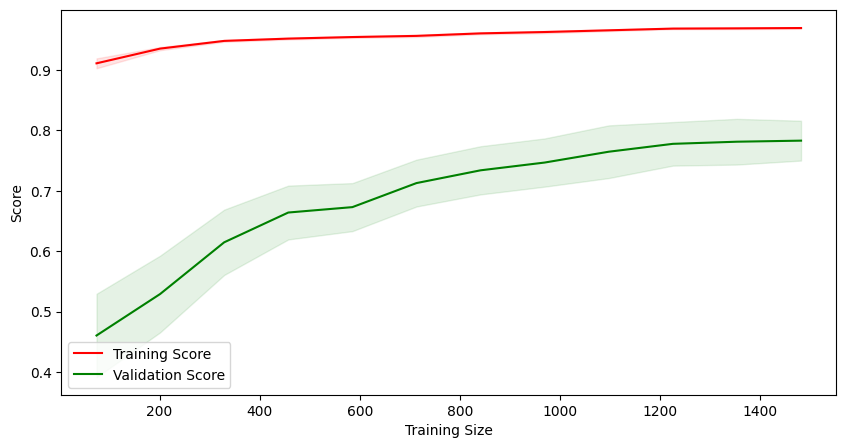

In [273]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, label='Training Score', color='red')
axes.plot(train_sizes, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(train_sizes, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Training Size')
axes.set_ylabel('Score')

# Hyperparameter Tuning for Random Forest Regressor

In [274]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distributions = {'n_estimators': sp_randint(50, 200),
                       'max_features': sp_randint(0, 10),
                       'max_depth': sp_randint(3, 20),}
print(param_distributions)
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', cv=10)

random_search.fit(X_train, y_train)

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c87b78b0>, 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c87b6a40>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c87d46a0>}


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c87d46a0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c87b6a40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c87b78b0>},
                   scoring='r2')

In [275]:
random_search.best_params_

{'max_depth': 14, 'max_features': 7, 'n_estimators': 173}

# Evauation on Testing Set

In [276]:
model = random_search.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Text(0.5, 1.0, 'using testing set')

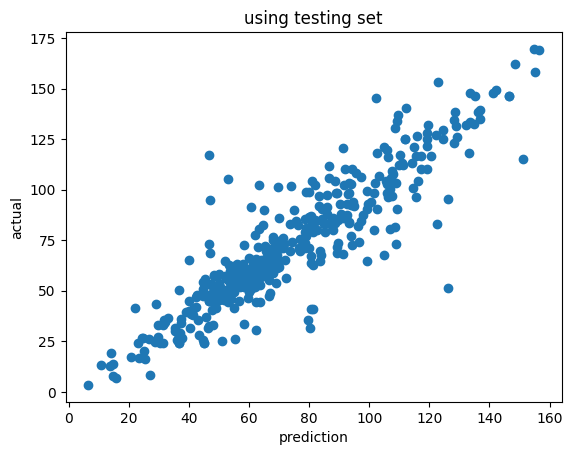

In [277]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [278]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.8217206356927427

# Evaluation on Training Set

Text(0.5, 1.0, 'using training set')

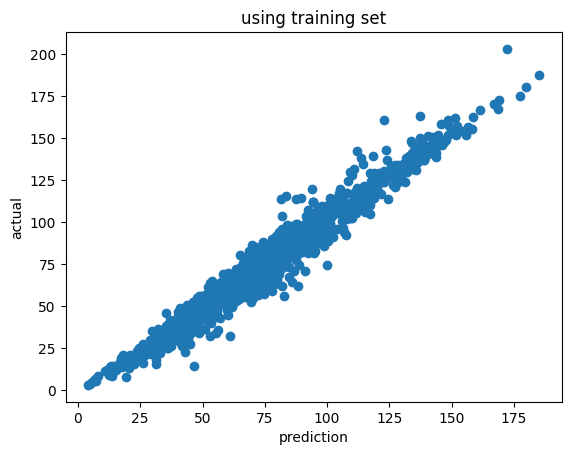

In [279]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [280]:
# see blind set score
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.9638086315033986

# Permutation Feature Importance for Random Forest Regressor

In [281]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, 
                           X_test, 
                           y_test,
                           n_repeats=30)

In [282]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	1.100 +/- 0.086
RPM (rpm)	0.316 +/- 0.034
WOB (ton)	0.279 +/- 0.037


In [283]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([ 1.10018707e+00,  2.79286266e-01,  3.16365434e-01, -3.88412155e-04])

In [284]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([3, 1, 2, 0])

[Text(0, 0, 'MW IN (ppg)'),
 Text(0, 1, 'WOB (ton)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'TVD (m)')]

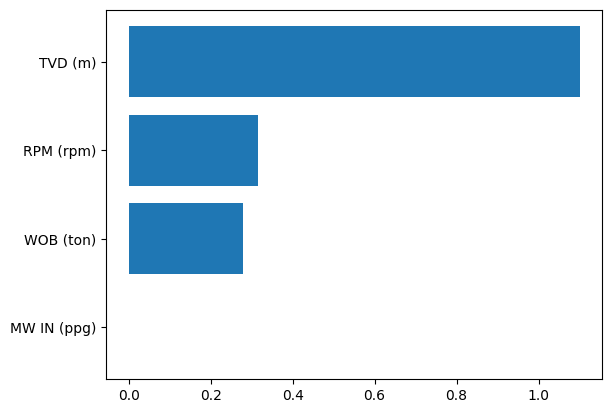

In [285]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

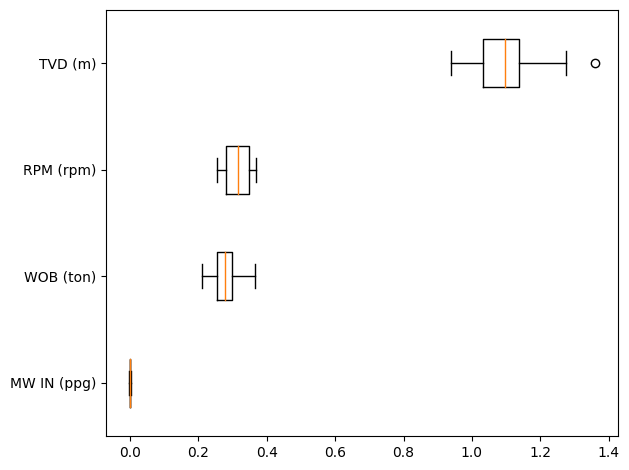

In [286]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

In [287]:
r.importances_mean

array([ 1.10018707e+00,  2.79286266e-01,  3.16365434e-01, -3.88412155e-04])

In [288]:
r.importances_std

array([0.08561681, 0.0370009 , 0.03416213, 0.00091878])

## Prediction Using the Model

In [289]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [290]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [291]:
output = model.predict(input)
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34.07129094])

# Dataset UP-6

In [292]:
sns.pairplot(data_up6)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [293]:
data_up6.corr(method='pearson')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_63109/2442845181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_up6.corr(method='pearson')


,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
BIT SIZE (in),1.000000,-0.564561,-0.564697,-0.395906,-0.345071,-0.806407,-0.765866,-0.725579,-0.587793,-0.839315,-0.780813,-0.917750,-0.425614
TMD (m),-0.564561,1.000000,1.000000,0.213169,0.438040,0.361647,0.888552,0.713320,0.602749,0.696235,0.690205,0.349969,0.956735
TVD (m),-0.564697,1.000000,1.000000,0.213224,0.438084,0.361773,0.888589,0.713368,0.602798,0.696284,0.690258,0.350125,0.956732
ROP (m/hr),-0.395906,0.213169,0.213224,1.000000,-0.135966,0.378144,0.428617,0.442368,0.164085,0.435029,0.442725,0.377494,0.123662
WOB (ton),-0.345071,0.438040,0.438084,-0.135966,1.000000,0.290254,0.404253,0.397486,0.683036,0.275437,0.404190,0.313981,0.484094
FR (gpm),-0.806407,0.361647,0.361773,0.378144,0.290254,1.000000,0.658340,0.599569,0.464492,0.664933,0.661712,0.931962,0.262606
SPP (psi),-0.765866,0.888552,0.888589,0.428617,0.404253,0.658340,1.000000,0.837415,0.671081,0.894277,0.869063,0.624811,0.772767
RPM (rpm),-0.725579,0.713320,0.713368,0.442368,0.397486,0.599569,0.837415,1.000000,0.578699,0.798945,0.765616,0.604082,0.632593
TQ (lb*ft),-0.587793,0.602749,0.602798,0.164085,0.683036,0.464492,0.671081,0.578699,1.000000,0.625198,0.639410,0.482882,0.512618
MW IN (ppg),-0.839315,0.696235,0.696284,0.435029,0.275437,0.664933,0.894277,0.798945,0.625198,1.000000,0.894667,0.678333,0.515321


Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_63109/73810749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')


[Text(0.5, 1.0, 'UP-6')]

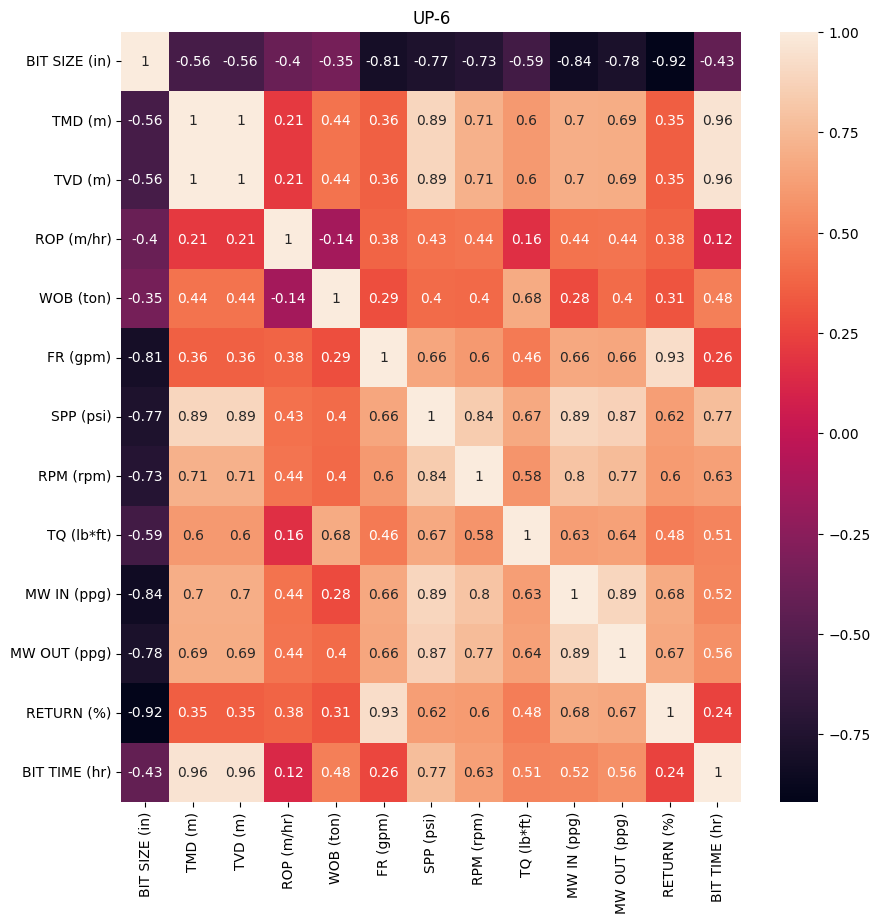

In [294]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')

# Preprocessing Dataset UP-6

In [295]:
#read data

data_up6 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-6.csv')
data_up6.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


In [296]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

In [297]:
#drop feature yang tidak diperlukan

data_up6.drop(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'FR (gpm)', 'SPP (psi)', 'TQ (lb*ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up6.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,18.02,25.6,2,62,8.7
1,19.00,35.5,2,57,8.7
2,19.50,20.6,2,43,8.7
3,19.50,20.1,2,58,8.7
4,19.50,19.9,2,58,8.7


[Text(0.5, 1.0, 'UP-6')]

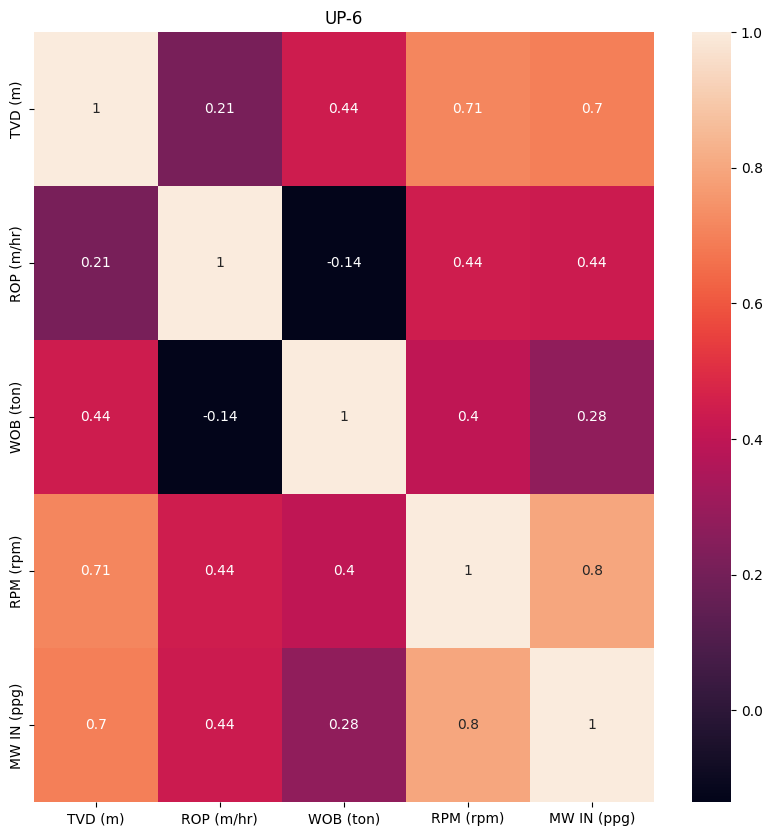

In [298]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')

In [299]:
data_up6.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,1273.917839,84.100398,9.636689,140.845603,10.543717
std,725.552343,42.813343,3.502575,33.564465,0.798868
min,18.020000,2.700000,0.000000,21.000000,8.420000
25%,646.000000,50.800000,7.000000,134.000000,10.577000
50%,1273.940000,77.400000,10.000000,150.000000,10.919000
75%,1901.870000,115.800000,12.000000,164.000000,10.977000
max,2529.770000,309.100000,21.000000,196.000000,11.208000


# Random Forest Regressor

In [300]:
#data_up5.drop(['Formation', 'TVD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up6.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,18.02,25.6,2,62,8.7
1,19.00,35.5,2,57,8.7
2,19.50,20.6,2,43,8.7
3,19.50,20.1,2,58,8.7
4,19.50,19.9,2,58,8.7


In [301]:
X = data_up6.drop(['ROP (m/hr)'], axis=1)
y = data_up6['ROP (m/hr)']

In [302]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [303]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.8207943872612338
0.9706355131941965


## Model Evaluation dan Inspection

In [304]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Validation Curve and Learning Curve for Random Forest Regressor

## Validation Curve

In [305]:
param_range=np.arange(1,6)
param_name='max_depth'
train_scores, valid_scores = validation_curve(RandomForestRegressor(), X_train,
                                              y_train, param_name=param_name,
                                              param_range=param_range, cv=10)

In [306]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

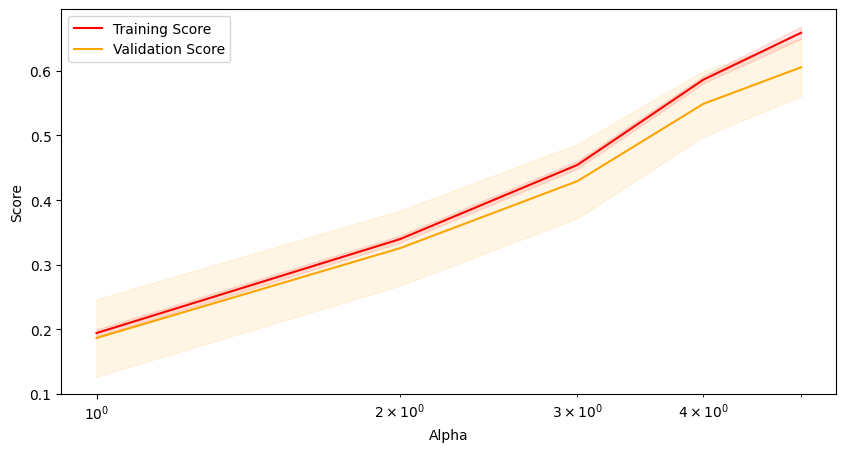

In [307]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.semilogx(param_range, train_scores_mean, label='Training Score', color='red')
axes.semilogx(param_range, valid_scores_mean, label='Validation Score', color='orange')
axes.fill_between(param_range, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='orange',
                  alpha=0.1)
axes.fill_between(param_range, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Alpha')
axes.set_ylabel('Score')

## Learning Curve

In [308]:
train_sizes = np.linspace(0.05,1,12)
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(RandomForestRegressor(), X_train,
                                                                  y_train, train_sizes=train_sizes, cv=10,
                                                                  return_times=True)

In [309]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

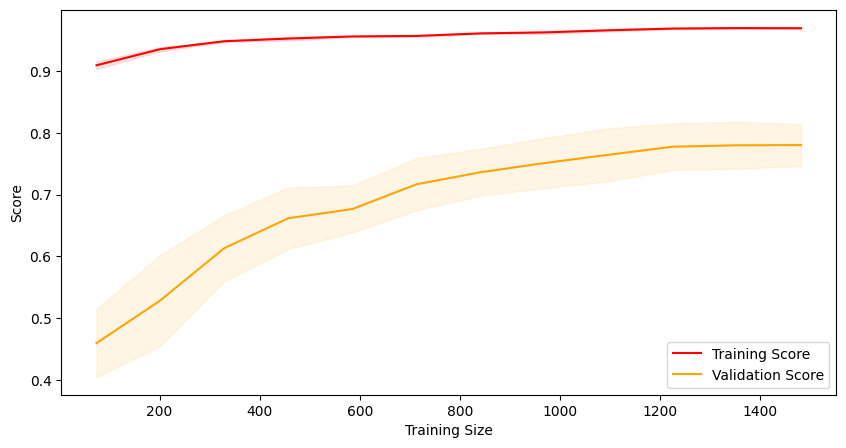

In [310]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, label='Training Score', color='red')
axes.plot(train_sizes, valid_scores_mean, label='Validation Score', color='orange')
axes.fill_between(train_sizes, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='orange',
                  alpha=0.1)
axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Training Size')
axes.set_ylabel('Score')

# Hyperparameter Tuning for Random Forest Regressor

In [311]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distributions = {'n_estimators': sp_randint(50, 200),
                       'max_features': sp_randint(0, 10),
                       'max_depth': sp_randint(3, 20),}
print(param_distributions)
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', cv=10)

random_search.fit(X_train, y_train)

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c8eff400>, 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2ca023250>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2ca020c40>}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2ca020c40>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2ca023250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2c8eff400>},
                   scoring='r2')

In [312]:
random_search.best_params_

{'max_depth': 14, 'max_features': 9, 'n_estimators': 121}

In [313]:
model = random_search.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Text(0.5, 1.0, 'using testing set')

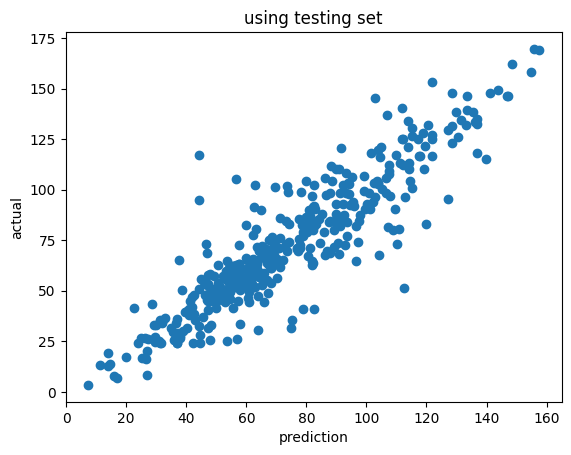

In [314]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [315]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.8247596495876267

In [316]:
y_pred_train = model.predict(X_train)

Text(0.5, 1.0, 'using training set')

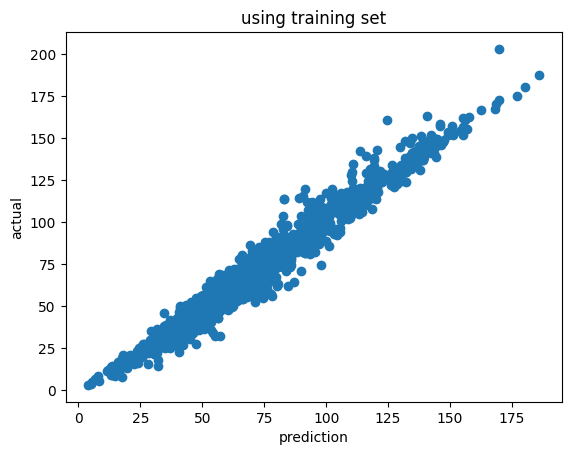

In [317]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [318]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.9639626904613297

# Permutation Feature Importance for Random Forest Regressor

In [319]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, 
                           X_test, 
                           y_test,
                           n_repeats=30)

In [320]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	1.089 +/- 0.065
RPM (rpm)	0.359 +/- 0.031
WOB (ton)	0.290 +/- 0.045


In [321]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([1.0893479 , 0.2895551 , 0.35887942, 0.00161359])

In [322]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([3, 1, 2, 0])

[Text(0, 0, 'MW IN (ppg)'),
 Text(0, 1, 'WOB (ton)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'TVD (m)')]

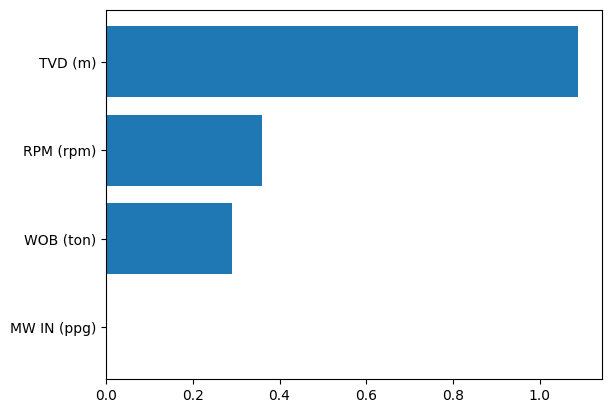

In [323]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

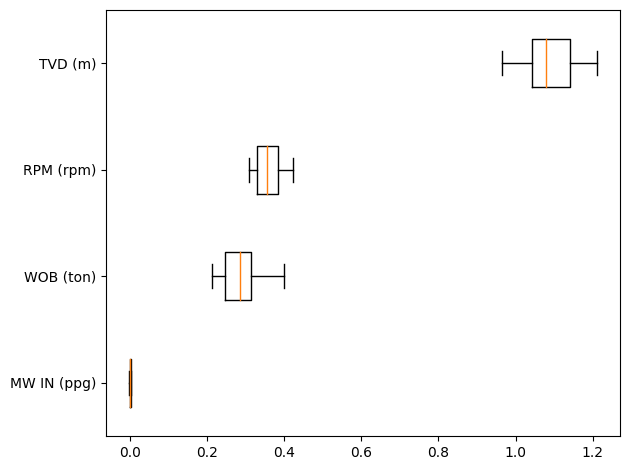

In [324]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

## Prediction Using the Model

In [325]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [326]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [327]:
output = model.predict(input)
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34.98888054])